<h1> Übung 1: Lineare Ausgleichsrechnung </h1>
<b>Wiederholung:</b> <br />
1. 2-D Datenpunkt Erstellen & Lineares Gleichungssystem <br />
2. Moore-Penrose Pseudo-Inverse <br />
3. SVD Pseudo-Inverse <br />
4. Lineares Gleichungssystem Lösen <br />
5. Fehler berechnen <br />

<b>Übung:</b> <br />
6. Lesen und Darstellen eines Bildes <br />
7. Punkte auf einer Linie im Bild finden **TODO** <br />
8. Lösen des Linearen Gleichungssystems / Berechnung der Geradengleichung **TODO** <br />
9. Berechnete Gerade im Bild anzeigen <br />

In [1]:
# Import Numpy for numerical operations, alias 'np' in code below
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 1. 2-D Datenpunkt Erstellen & Lineares Gleichungssystem
**Linear Equation: y = a*x + b, 2-D datapoint di = (x,y)**

**Aim of cell below:** Bring given 2-D datapoints in form of linear equation, e.g. for three datapoints: **A*x = y**<br>
[x1 1]$\;\;$  [a]$\;\;$     [y1]<br>
[x2 1] * [b]  = [y2]<br>
[x3 1]$\;\;$$\;\;$$\;\;$$\;\;$   [y3] 

In [2]:
# Given 2-D datapoints, d1 = (2, 2.95), d2 = (6, 4.9), d3 = (4, 4.2)
data = np.matrix([[2, 2.95],
                  [6, 4.9],
                  [4, 4.2]])

# Create A matrix for linear equation that includes x-values in first column and 1s in second column
A = np.ones(data.shape)

# Vector that includes all y values 
y = np.ones(len(data))


for i in range(0,len(data)):
        # Copy columns from data to equation variables
        A[i][0] = data[i,0]
        y[i] = data[i,1]
        

# Final variables
print("\n A-matrix: \n" + str(A))
print("\ny-values: \n" + str(y))

NameError: name 'np' is not defined

## 2. Moore-Penrose Pseudo-Inverse

In [1]:
def get_moore_penrose_inverse(mat):
  # Use pinv function in numpy.linalg to calculate pseudo-inverse of a given matrix.
  mat_pinv = np.linalg.pinv(mat)
  return np.round(mat_pinv,7)

## 3. SVD Pseudo-Inverse 

In [4]:
def get_svd_pseudo_inverse(mat):
  # Use svd function in numpy.linalg to calculate SVD of a given matrix.
  u,s,v = np.linalg.svd(mat)

  print("U:\n", u)
  print("\nS:\n", s)
  print("\nV:\n", v)

  sigma = np.zeros(mat.shape)
  np.fill_diagonal(sigma,s)

  # Verify the singular value decomposition of matrix x
  a = u.dot(sigma.dot(v))
  print("\nA:\n", a)

  # Reciprocate all entries of s to form pseudo-inverse of sigma
  sigma_diag_inv = np.zeros(mat.shape)
  np.fill_diagonal(sigma_diag_inv, 1/s)

  # Compute the pseudo-inverse of matrix x using SVD results
  mat_pinv_svd = np.dot(v, np.dot(np.transpose(sigma_diag_inv), np.transpose(u)))
  return np.round(mat_pinv_svd,7)

## 4. Lineares Gleichungssystem Lösen
**E.g. for solving equation with 3 datapoints:** <br>
[a]$\;\;$ = ([x1, 1]) ^-1 $\;\;$ * $\;\;$ [y1] <br>
[b] $\;\;$ $\;$ ([x2, 1])$\;\;$ $\;\;$$\;\;$ $\;\;$$\;\;$  [y2] <br>
$\;\;$ $\;\;$ $\;\;$ ([x3, 1])$\;\;$ $\;\;$ $\;\;$ $\;\;$$\;$  [y3]

In [5]:
# Calculate result from linear equation - a,b | a*x + b = y
A_inv = get_moore_penrose_inverse(A)
print("Moore-Penrose Pseudo-Inverse:\n", A_inv)

#A_inv = get_svd_pseudo_inverse(x)
#print("\nSVD Peusdo-Inverse:\n", A_inv)

# Solve linear equation, in this case 2-D for a,b 
result = np.dot(A_inv, y)
a = np.round(result[0],7)
b = np.round(result[1],7)

# Show results
print("\nValues for unknown variables:")
print("a = ", a)
print("b = ", b)
print("\nEquation of line: y = "+ str(a) +"* x + " + str(b))

Moore-Penrose Pseudo-Inverse:
 [[-0.25       0.25      -0.       ]
 [ 1.3333333 -0.6666667  0.3333333]]

Values for unknown variables:
a =  0.4875
b =  2.0666663

Equation of line: y = 0.4875* x + 2.0666663


## 5. Fehler Berechnen (für verrauschte Daten)
**E.g. for computing error with 3 datapoints:**<br>
[r1] $\;\;$ [y1]$\;\;$[x1, 1]$\;\;$ $\;\;$[a]<br>
[r2] = [y2] - [x2, 1] *$\;\;$ [b]<br>
[r3] $\;\;$ [y3]$\;\;$[x3, 1] 

In [6]:
# Calculate error values regarding linear equation results
error_vec = y - (np.dot(A, result))

# Calculate absolute error
error_r = np.absolute(np.dot(error_vec, error_vec))

# Print error results
print("Error Vector: \n",error_vec)

# Error value = np.dot(error vector, error vector), inner product
print("\nError Value: \n", error_r)

Error Vector: 
 [-0.09166627 -0.09166627  0.18333373]

Error Value: 
 0.05041666666715072


## 6. Lesen und Darstellen eines Bildes



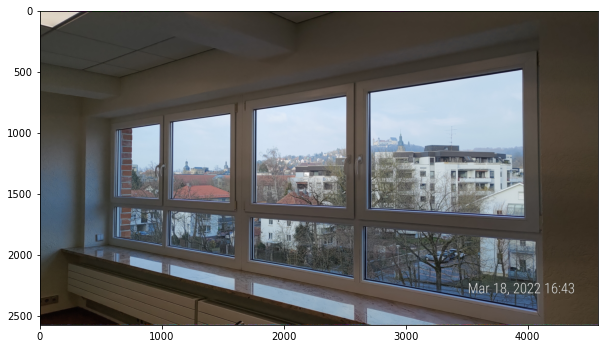

In [7]:
#read image
image = cv2.imread('window-image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(image)

## 7. Punkte auf einer Linie im Bild finden **TODO**
Laden Sie das Bild von Moodle herunter und öffnen Sie es in einem Bildbearbeitungsprogramm (z.B. Paint)
Wenn Sie mit der Maus über das Bild fahren, können Sie die Koordinaten einzelner Punkte auslesen.
Wählen Sie einige Punkte entlang einer Kante im Bild aus und notieren Sie sich die Koordinaten in der folgenden Matrix.

In [8]:
#put the image points in this matrix (you can also add more point-pairs)
image_points = np.matrix([   [?, ?], [?, ?], [?, ?] ]) #TODO

# Create A matrix for linear equation that includes x-values in first column and 1s in second column
A = np.ones(image_points.shape)

# Vector that includes all y values 
y = np.ones(len(image_points))


for i in range(0,len(image_points)):
        # Copy columns from data to equation variables
        A[i][0] = image_points[i,0]
        y[i] = image_points[i,1]
        

# Final variables
print("\n A-matrix: \n" + str(A))
print("\ny-values: \n" + str(y))


 A-matrix: 
[[200.   1.]
 [370.   1.]
 [680.   1.]
 [180.   1.]]

y-values: 
[125. 100.  60.  60.]


## 8. Lösen des Linearen Gleichungssystems / Berechnung der Geradengleichung
Berechnen Sie im folgenden die Pseudoinverse von A und lösen Sie das lineare Gleichungssystem, sodass sie die Parameter a und b der Geradengleichung erhalten.

In [9]:
# Pseudoinverse berechnen
#TODO

print("Moore-Penrose Pseudo-Inverse:\n", A_inv)

# Lineares Gleichungssystem lösen
#TODO


# Ergebnis für a und b:
a = np.round(result[0],7)
b = np.round(result[1],7)
print("\nValues for unknown variables:")
print("a = ", a)
print("b = ", b)
print("\nEquation of line: y = "+ str(a) +"* x + " + str(b))

Moore-Penrose Pseudo-Inverse:
 [[-9.815000e-04  7.790000e-05  2.009700e-03 -1.106100e-03]
 [ 6.008724e-01  2.221530e-01 -4.684530e-01  6.454276e-01]]

Values for unknown variables:
a =  -0.0606815
b =  107.942826

Equation of line: y = -0.0606815* x + 107.942826


## 9. Berechnete Gerade im Bild anzeigen

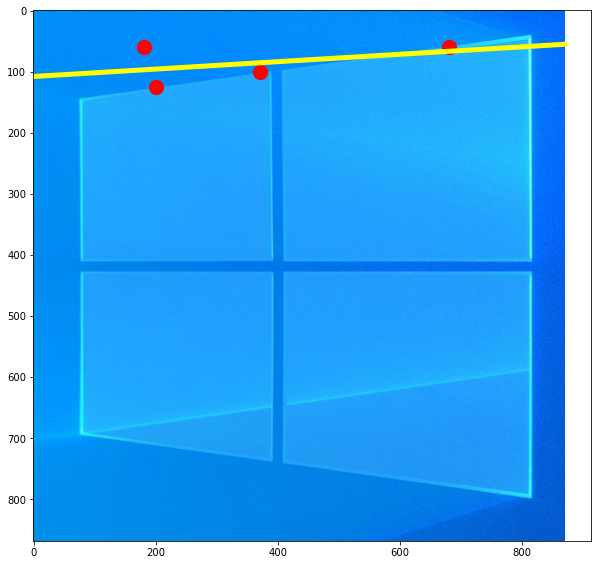

In [10]:
#show image again
plt.rcParams["figure.figsize"] = (10,10)
plt.imshow(image)

#show selected points in red
plt.scatter(np.ravel(image_points[:,0]), np.ravel(image_points[:,1]),color='red', s=200)


#show fitted line in yellow
line_x = np.array([0,len(image[1])])
line_y = line_x*a+b
plt.plot(line_x, line_y, color='yellow', linewidth=5.0)
